# Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE #to correct skewness

In [ ]:
file = pd.read_csv(r"/content/drive/MyDrive/ML/diabetes[47].csv") #uplaoding data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
file.shape

(768, 9)

In [ ]:
file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
file['Outcome'].value_counts()
#unstructured
#more values for non diabetic than diabetic

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
file.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
def outliers(file):
    for column_name in file.columns:
        q1 = file[column_name].quantile(0.25)
        q3 = file[column_name].quantile(0.75)
        iqr = q3-q1
        lower_limit = q1-1.5*iqr
        upper_limit = q3+1.5*iqr
        print(f"{column_name}>>Lower_limit:{lower_limit} \n Upper_limit:{upper_limit}")
        file = file[(file[column_name]>lower_limit)&(file[column_name]<upper_limit)]
        
    return file

In [ ]:
df = outliers(file)

Pregnancies>>Lower_limit:-6.5 
 Upper_limit:13.5
Glucose>>Lower_limit:37.5 
 Upper_limit:201.5
BloodPressure>>Lower_limit:35.0 
 Upper_limit:107.0
SkinThickness>>Lower_limit:-49.5 
 Upper_limit:82.5
Insulin>>Lower_limit:-198.0 
 Upper_limit:330.0
BMI>>Lower_limit:13.699999999999994 
 Upper_limit:49.70000000000001
DiabetesPedigreeFunction>>Lower_limit:-0.30737499999999995 
 Upper_limit:1.165625
Age>>Lower_limit:-0.75 
 Upper_limit:65.25
Outcome>>Lower_limit:-1.5 
 Upper_limit:2.5


In [ ]:
file.shape

(768, 9)

In [ ]:
x = file.drop(columns = "Outcome", axis=1)
y = file["Outcome"]

In [ ]:
smote = SMOTE()
x,y = smote.fit_resample(x,y)
x.shape,y.shape

((1000, 8), (1000,))

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Correlation

In [ ]:
file.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


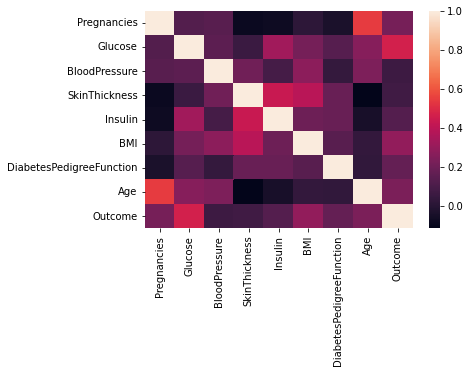

In [ ]:
sns.heatmap(file.corr())

# Data Visualization

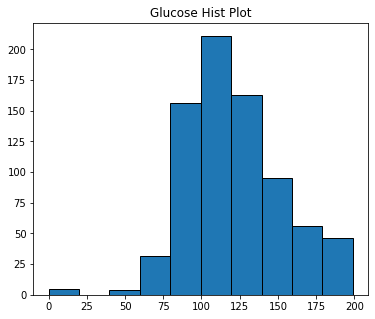

In [ ]:
#a histogram presentation
plt.figure(figsize=(6,5))
plt.hist("Glucose",data=file,edgecolor="k")
plt.title("Glucose Hist Plot")
plt.show()

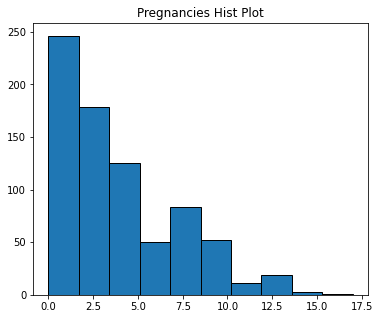

In [ ]:
plt.figure(figsize=(6,5))
plt.hist("Pregnancies",data=file,edgecolor="k")
plt.title("Pregnancies Hist Plot")
plt.show()

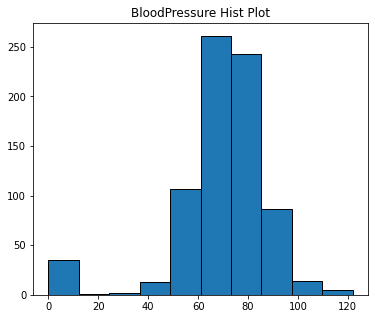

In [ ]:
plt.figure(figsize=(6,5))
plt.hist("BloodPressure",data=file,edgecolor="k")
plt.title("BloodPressure Hist Plot")
plt.show()

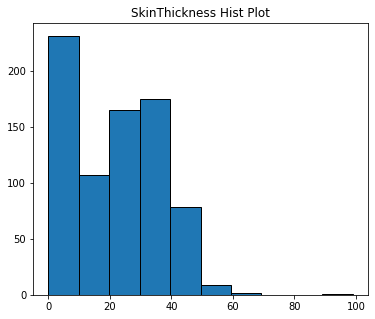

In [ ]:
plt.figure(figsize=(6,5))
plt.hist("SkinThickness",data=file,edgecolor="k")
plt.title("SkinThickness Hist Plot")
plt.show()

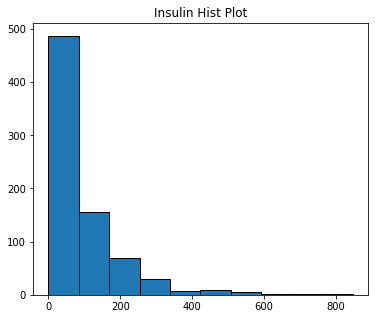

In [ ]:
plt.figure(figsize=(6,5))
plt.hist("Insulin",data=file,edgecolor="k")
plt.title("Insulin Hist Plot")
plt.show()

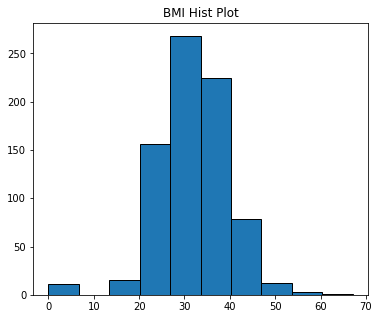

In [ ]:
plt.figure(figsize=(6,5))
plt.hist("BMI",data=file,edgecolor="k")
plt.title("BMI Hist Plot")
plt.show()

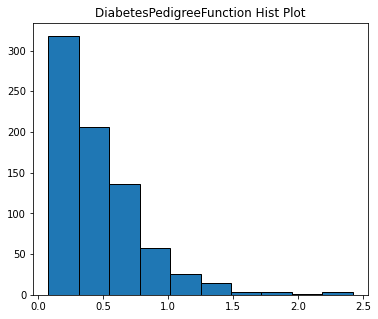

In [ ]:
plt.figure(figsize=(6,5))
plt.hist("DiabetesPedigreeFunction",data=file,edgecolor="k")
plt.title("DiabetesPedigreeFunction Hist Plot")
plt.show()

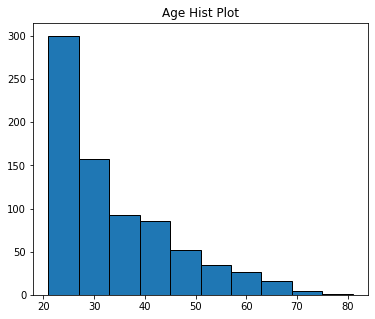

In [ ]:
plt.figure(figsize=(6,5))
plt.hist("Age",data=file,edgecolor="k")
plt.title("Age Hist Plot")
plt.show()

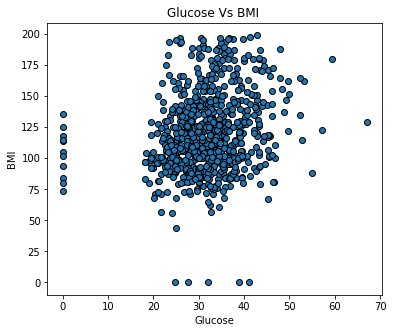

In [ ]:
#a scatter plot presentation
plt.figure(figsize=(6,5))
plt.scatter("BMI","Glucose",data=file,edgecolor="k")
plt.title("Glucose Vs BMI ")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

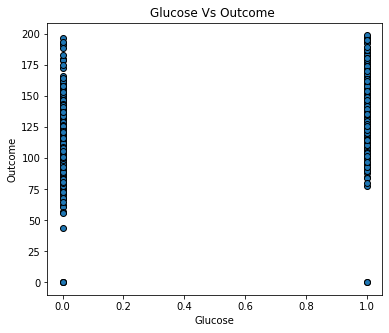

In [ ]:
#a scatter plot presentation
plt.figure(figsize=(6,5))
plt.scatter("Outcome","Glucose",data=file,edgecolor="k")
plt.title("Glucose Vs Outcome ")
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.show()

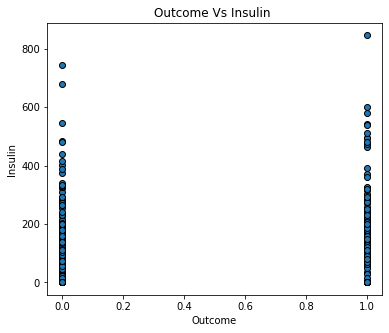

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter("Outcome","Insulin",data=file,edgecolor="k")
plt.title("Outcome Vs Insulin ")
plt.xlabel("Outcome")
plt.ylabel("Insulin")
plt.show()

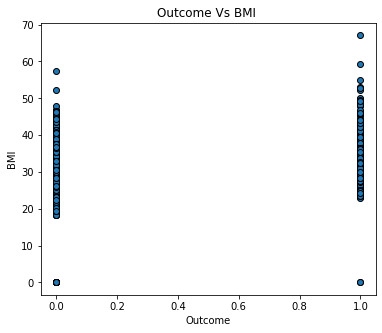

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter("Outcome","BMI",data=file,edgecolor="k")
plt.title("Outcome Vs BMI ")
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()

In [ ]:
file.shape

(768, 9)

# Train test split

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 8) (200, 8) (800,) (200,)


# Logistic Regression

In [ ]:
logreg = LogisticRegression(solver="liblinear")

In [ ]:
logreg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
logreg.score(x_test,y_test)

0.765

In [ ]:
y_pred=logreg.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[74, 17],
       [30, 79]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


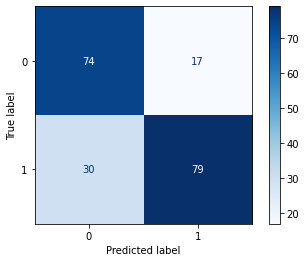

In [ ]:
plot_confusion_matrix(logreg,x_test,y_test,cmap="Blues",values_format=".3g")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        91
           1       0.82      0.72      0.77       109

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200



# KNN 

In [ ]:
import math
math.sqrt(len(y_test))

14.142135623730951

In [ ]:
kn_classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric="euclidean")
kn_classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
y_pred = kn_classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[68, 23],
       [26, 83]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


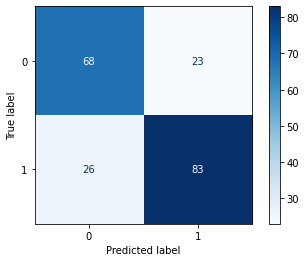

In [ ]:
plot_confusion_matrix(kn_classifier,x_test,y_test,cmap="Blues",values_format=".3g")

In [ ]:
f1_score(y_test,y_pred)

0.772093023255814

In [ ]:
accuracy_score(y_test,y_pred)

0.755

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74        91
           1       0.78      0.76      0.77       109

    accuracy                           0.76       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.76      0.76      0.76       200



# Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.76

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


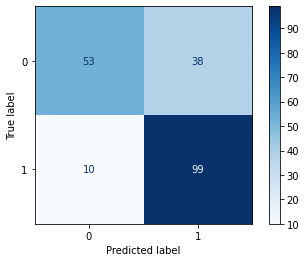

In [ ]:
plot_confusion_matrix(dt,x_test,y_test,cmap="Blues",values_format=".3g")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.58      0.69        91
           1       0.72      0.91      0.80       109

    accuracy                           0.76       200
   macro avg       0.78      0.75      0.75       200
weighted avg       0.78      0.76      0.75       200



# Random Forest Classifier

In [ ]:
ranfor = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=3,criterion="gini")

In [ ]:
ranfor.fit(x_train,y_train)


RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred = ranfor.predict(x_test)

In [ ]:
ranfor.score(x_train,y_train)

0.8275

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[69, 22],
       [23, 86]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


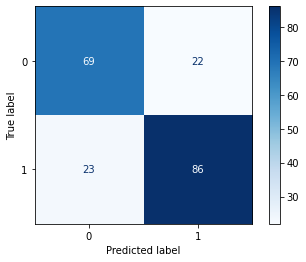

In [ ]:
plot_confusion_matrix(ranfor,x_test,y_test,cmap="Blues",values_format=".3g")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        91
           1       0.80      0.79      0.79       109

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200



## Importing the Dependencies

In [ ]:
from sklearn import svm
file['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
file.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = file.drop(columns = 'Outcome', axis=1)
Y = file['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(y)

## Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = file['Outcome']

In [ ]:
print(x)
print(y)

[[ 0.59639083  0.66809666  0.1309253  ...  0.0998244   0.41248201
   1.41695009]
 [-0.89458624 -1.2639708  -0.17920175 ... -0.83053877 -0.42901637
  -0.25918313]
 [ 1.19278166  1.74146748 -0.28257743 ... -1.26913855  0.54968283
  -0.17096559]
 ...
 [ 1.49097707 -0.98796116  0.69949156 ...  0.30276359  1.22509108
   1.68160271]
 [ 0.29819541  1.25078367 -0.23088959 ...  0.00489722 -1.08194144
   0.62299225]
 [ 0.59639083 -0.71195153  0.18261314 ...  0.7742387   1.21748366
   1.15229748]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Training the Model


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


## Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
